In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

Step 1:
Read and Understanding Data

In [2]:
foo = pd.read_csv("insurance.csv")
foo.head(n=10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
foo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [4]:
foo.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Step 2 :
Cleaning Data

In [5]:
le = preprocessing.LabelEncoder()

foo['sex'] = le.fit_transform(foo['sex'])
foo['smoker'] = le.fit_transform(foo['smoker'])
foo['region'] = le.fit_transform(foo['region'])

foo.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Step 3: 
Feature Selection and Visual Representation

<Figure size 1080x1440 with 0 Axes>

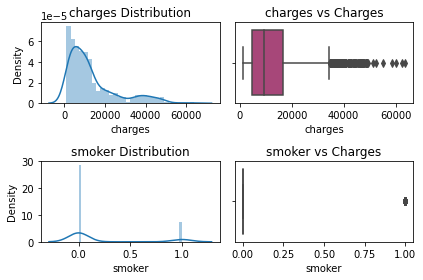

In [6]:
def sub(x,fig):
    plt.subplot(2,2,fig)
    plt.title(x+' Distribution')
    sns.distplot(foo[x])
    plt.subplot(2,2,fig+1)
    plt.title(x+' vs Charges')
    sns.boxplot(x=foo[x], palette = ("magma"))

plt.figure(figsize=(15,20))
plt.show()
sub('charges',1)
sub('smoker',3)
plt.tight_layout()

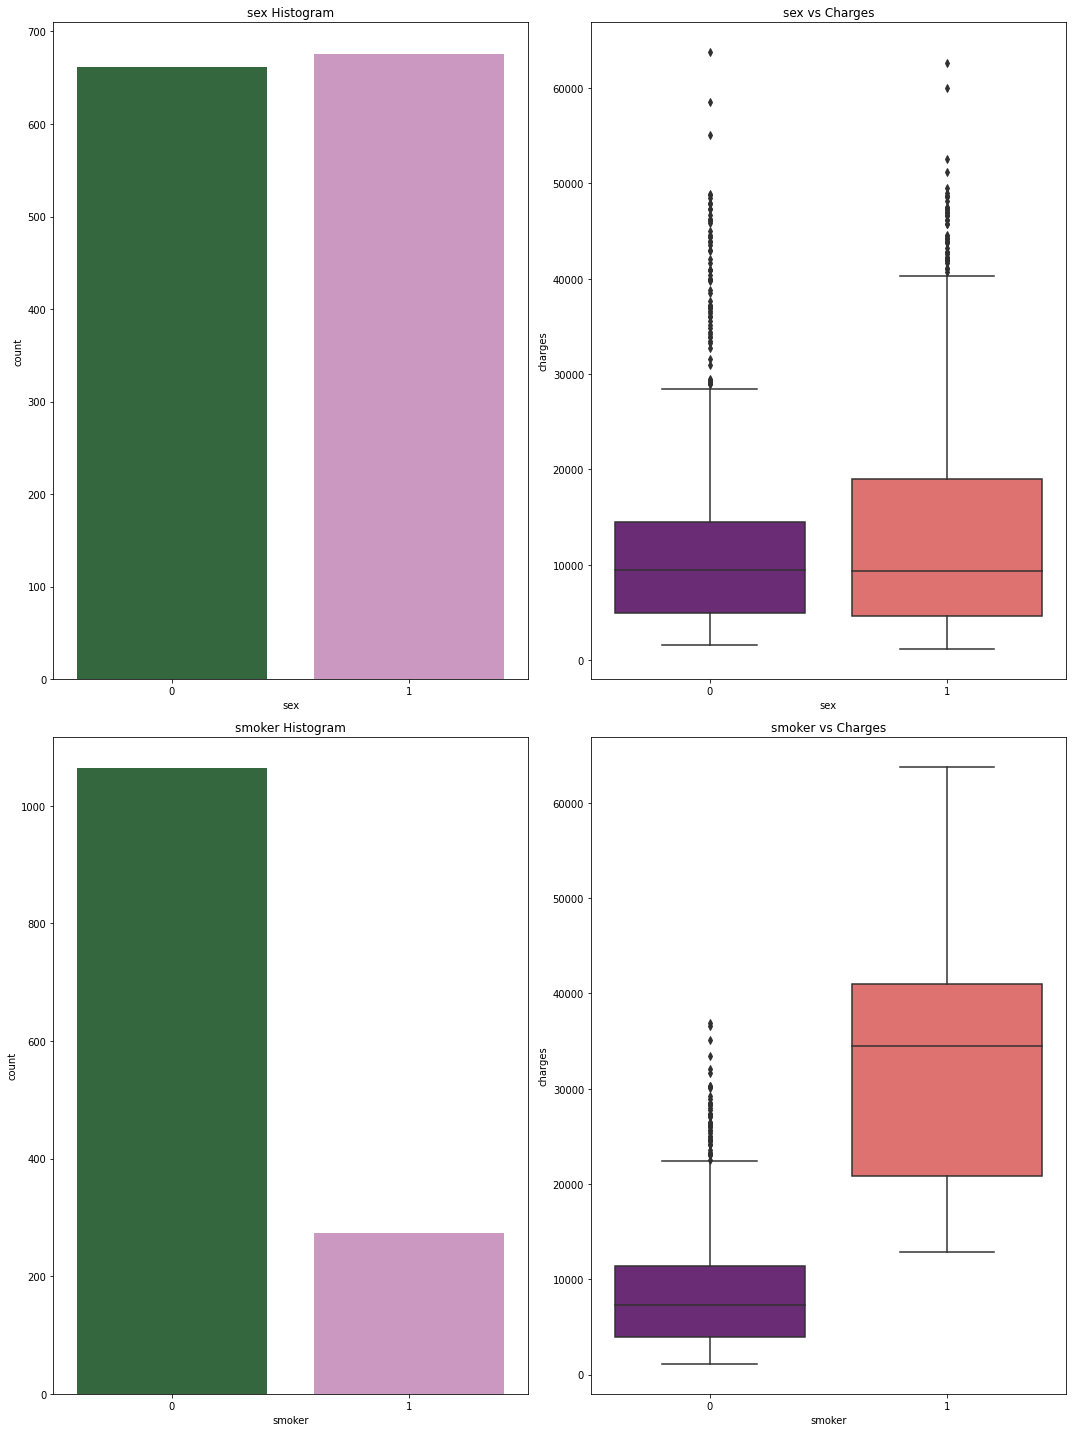

In [7]:
def histbox(x, fig):
    plt.subplot(2,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(foo[x], palette = ("cubehelix"))
    plt.subplot(2,2,fig+1)
    plt.title(x+' vs Charges')
    sns.boxplot(x=foo[x], y=foo.charges, palette = ("magma"))
    
plt.figure(figsize=(15,20))
histbox('sex',1)
histbox('smoker',3)

plt.tight_layout()

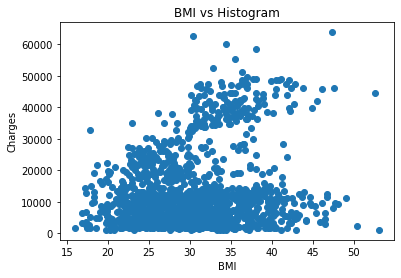

<Figure size 1080x1440 with 0 Axes>

In [8]:
plt.subplot(1,1,1)
plt.title('BMI vs Histogram')
plt.scatter(x=foo.bmi,y=foo.charges)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.figure(figsize=(15,20))
plt.show()

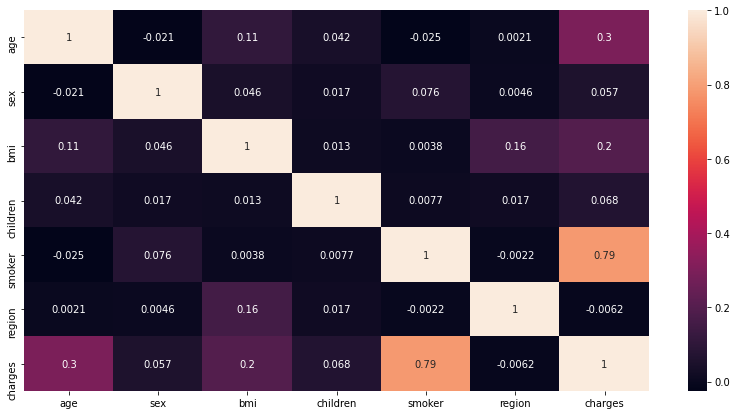

In [9]:
plt.figure(figsize=(14,7))
sns.heatmap(foo.corr(), annot=True)
plt.show()

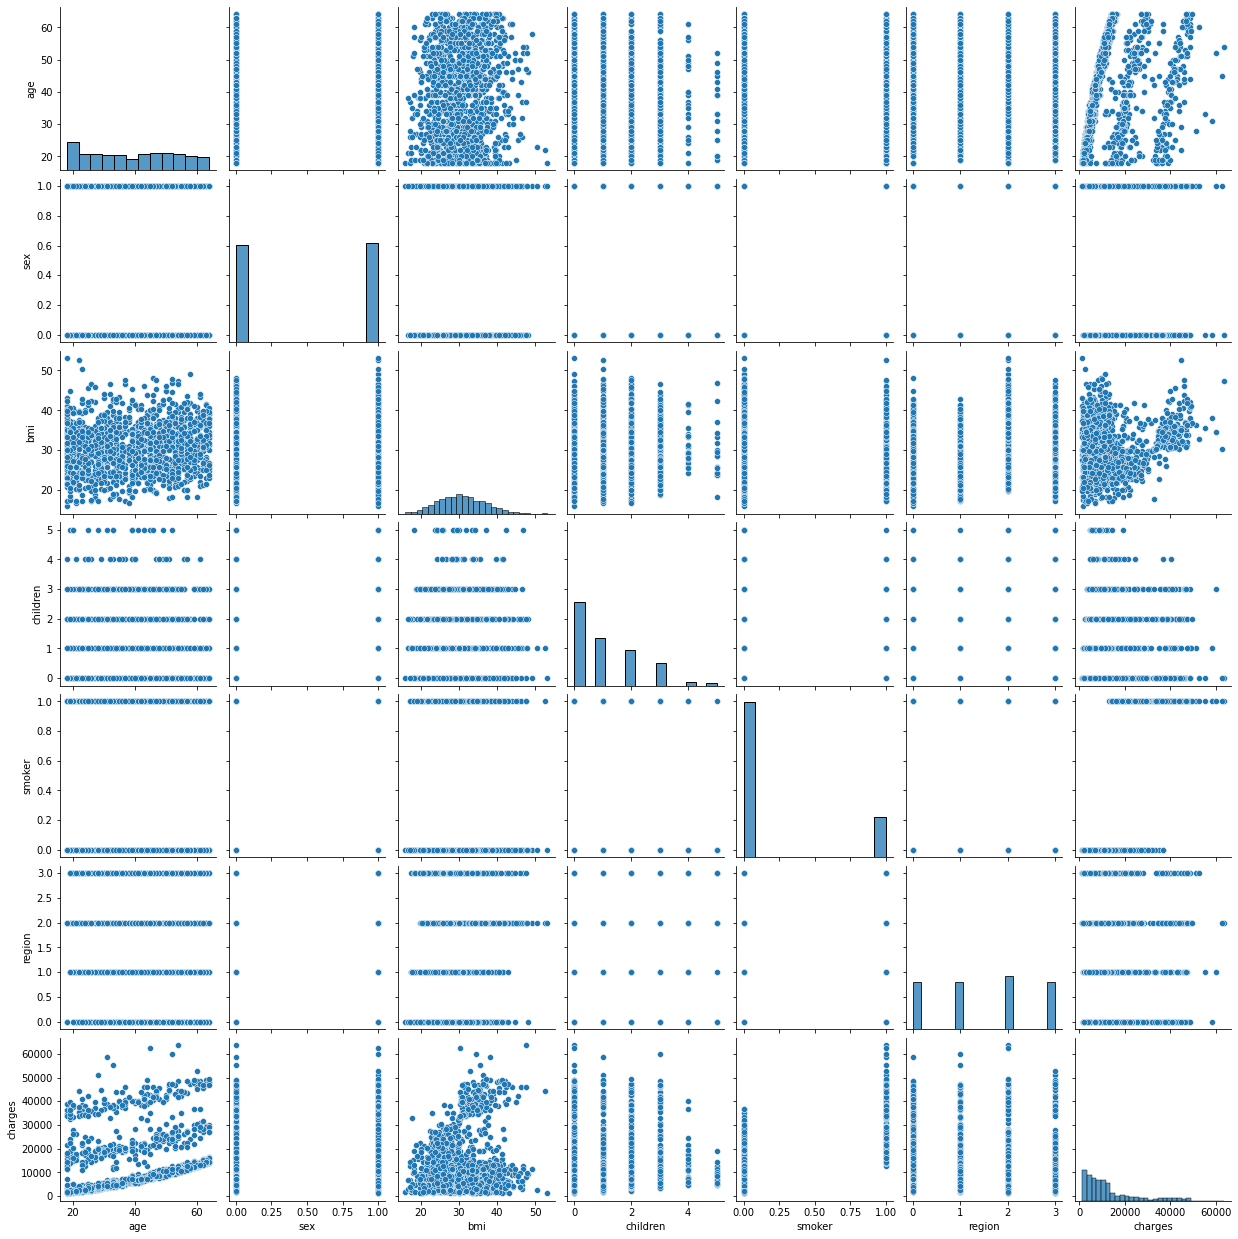

In [10]:
sns.pairplot(foo)
plt.show()

In [11]:
X = foo.drop('charges', axis=1)
y = foo['charges']

In [12]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv= 5)
print(scores)

[0.76347528 0.80131528 0.63247221 0.68762113 0.75929268]


In [14]:
model=model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [15]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  33805466.89868861
R2 Score:  0.7694415927057694


# Pipeline

ML pipeline is a means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated.

Another type of ML pipeline is the art of splitting up your machine learning workflows into independent, reusable, modular parts that can then be pipelined together to create models. This type of ML pipeline makes building models more efficient and simplified, cutting out redundant work.

To understand why pipelining is so important in machine learning performance and design, take into account a typical ML workflow.

Ingestion -> Cleaning -> Preprocessing -> Modeling -> Deployment

In a mainstream system design, all of these tasks would be run together in a monolith. This means the same script will extract the data, clean and prepare it, model it, and deploy it. Since machine learning models usually consist of far less code than other software applications, the approach to keep all of the assets in one place makes sense. 

However, when trying to scale a monolithic architecture, three significant problems arise:

1) Volume: when deploying multiple versions of the same model, you have to run the whole workflow twice, even though the first steps of ingestion and preparation are exactly identical.
2) Variety: when you expand your model portfolio, you’ll have to copy and paste code from the beginning stages of the workflow, which is inefficient and a bad sign in software development.
3) Versioning: when you change the configuration of a data source or other commonly used part of your workflow, you’ll have to manually update all of the scripts, which is time consuming and creates room for error. 

With the ML pipeline, each part of your workflow is abstracted into an independent service. Then, each time you design a new workflow, you can pick and choose which elements you need and use them where you need them, while any changes made to that service will be made on a higher level.

A pipelining architecture solves the problems that arise at scale:

1) Volume: only call parts of the workflow when you need them, and cache or store results that you plan on reusing.
2) Variety: when you expand your model portfolio, you can use pieces of the beginning stages of the workflow by simply pipelining them into the new models without replicating them.
3) Versioning: when services are stored in a central location and pipelined together into various models, there is only one copy of each piece to update. All instances of that code will update when you update the original.

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1=make_pipeline(StandardScaler(),LinearRegression())
model_1.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [17]:
model_1.score(X_test,y_test)

0.7694415927057694

In [18]:
y_pred=model_1.predict(X_test)
mean_absolute_error(y_test,y_pred)

4155.239843059376

Lasso

In [19]:
from sklearn.linear_model import Lasso
model_2=make_pipeline(StandardScaler(),Lasso())
model_2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [20]:
model_2.score(X_test,y_test)

0.769445571232477

In [21]:
y_pred=model_2.predict(X_test)
mean_absolute_error(y_test,y_pred)

4155.058870902819

RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
model_3=make_pipeline(StandardScaler(),RandomForestRegressor())
model_3.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [23]:
model_3.score(X_test,y_test)

0.856501304006831

In [24]:
y_pred=model_3.predict(X_test)
mean_absolute_error(y_test,y_pred)

2518.2335951375626